Steps for Building the Perceptron Classifier
1. Data Preparation
- Load the embeddings dataset generated for TinyBERT and DistilBERT.
- Separate the embeddings and their corresponding Gender_encoded labels.
- Split the data into training and testing sets.

2. Build a Perceptron Classifier
- Use a simple perceptron model for binary classification (masculine = 1, feminine = 0).
- Train the perceptron using the training embeddings and labels.

3.Build a Logistic Regression Classifier
Use logistic regression as an alternative model for binary classification (masculine = 1, feminine = 0).
Train the logistic regression model on the same training data.

4. Evaluate the Classifier
Compute evaluation metrics such as accuracy, precision, recall, and F1-score on the test set.
Display a confusion matrix to understand the classifier's performance.

5. Visualize Results
- Plot the decision boundary  using dimensionality reduction techniques like PCA or t-SNE (if applicable).
- Analyze the weights of the perceptron to understand which embedding dimensions are significant for gender classification.

In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# 🔹 Step 1: Load and Preprocess Data
def load_and_prepare_data(file_path):
    """
    Load embeddings from CSV and convert embeddings from strings to numpy arrays.
    :param file_path: Path to the embeddings CSV file.
    :return: X (embedding matrix), y (labels)
    """
    print(f"📥 Loading data from: {file_path}")

    # Load data
    data = pd.read_csv(file_path)

    # Convert embedding strings to NumPy arrays
    def parse_embedding(embedding_str):
        return np.array(ast.literal_eval(embedding_str), dtype=np.float32)  # Convert safely

    # Apply conversion
    data["Embedding"] = data["Embedding"].apply(parse_embedding)

    # Convert embeddings into a matrix (X) and extract labels (y)
    X = np.vstack(data["Embedding"].values)
    y = data["Gender"].values  # Gender labels

    print(f"✅ Data Loaded: {X.shape[0]} samples, {X.shape[1]} dimensions.\n")
    return X, y



In [3]:
# 🔹 Step 2: Split Data into Training and Testing Sets
def split_data(X, y):
    """
    Split the data into training and testing sets.
    :param X: Embedding matrix.
    :param y: Labels.
    :return: X_train, X_test, y_train, y_test
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"📊 Data Split: ")
    print(f"   - Training Data: {X_train.shape}, Labels: {y_train.shape}")
    print(f"   - Testing Data: {X_test.shape}, Labels: {y_test.shape}\n")

    return X_train, X_test, y_train, y_test



In [4]:
# Step 3: Train and Evaluate Classifiers
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    """
    Train and evaluate the given model on the training and testing data.
    :param model: Classifier model to train.
    :param model_name: Name of the model for reporting.
    :param X_train: Training data.
    :param X_test: Testing data.
    :param y_train: Training labels.
    :param y_test: Testing labels.
    """
    print(f"📈 Training {model_name} Classifier...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ {model_name} Model Accuracy: {accuracy:.4f}\n")

    # Classification report
    print(f"🔍 Evaluation Report for {model_name}:\n")
    print(classification_report(y_test, y_pred, target_names=["Feminine", "Masculine"]))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Feminine", "Masculine"])
    disp.plot(cmap="Blues")
    plt.title(f"{model_name} Gender Classification Confusion Matrix")
    plt.show()

    return accuracy


🏆 Running Pipeline for TinyBERT 🏆

📥 Loading data from: C:/Users/user1/Desktop/HarvestWE-main/TinyBERT_embeddings_with_gender_1.csv
✅ Data Loaded: 170766 samples, 312 dimensions.

📊 Data Split: 
   - Training Data: (136612, 312), Labels: (136612,)
   - Testing Data: (34154, 312), Labels: (34154,)

📈 Training Perceptron Classifier...
✅ Perceptron Model Accuracy: 0.6144

🔍 Evaluation Report for Perceptron:

              precision    recall  f1-score   support

    Feminine       0.55      0.94      0.70     16133
   Masculine       0.86      0.32      0.47     18021

    accuracy                           0.61     34154
   macro avg       0.71      0.63      0.58     34154
weighted avg       0.72      0.61      0.58     34154



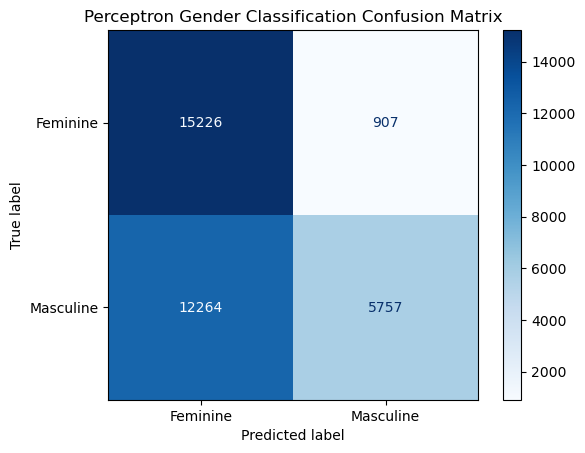

📈 Training Logistic Regression Classifier...
✅ Logistic Regression Model Accuracy: 0.7472

🔍 Evaluation Report for Logistic Regression:

              precision    recall  f1-score   support

    Feminine       0.74      0.72      0.73     16133
   Masculine       0.75      0.77      0.76     18021

    accuracy                           0.75     34154
   macro avg       0.75      0.75      0.75     34154
weighted avg       0.75      0.75      0.75     34154



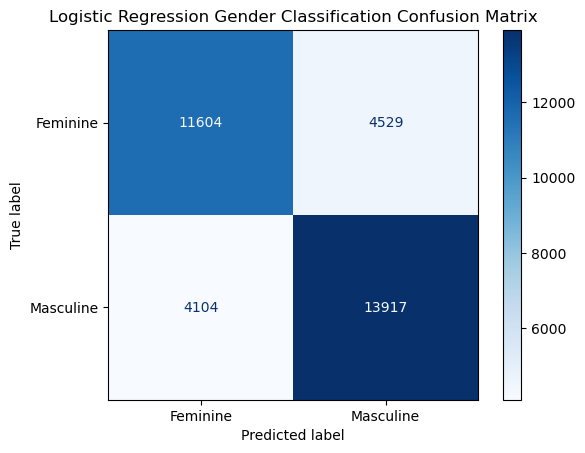

📈 Training Random Forest Classifier...
✅ Random Forest Model Accuracy: 0.7819

🔍 Evaluation Report for Random Forest:

              precision    recall  f1-score   support

    Feminine       0.79      0.73      0.76     16133
   Masculine       0.77      0.83      0.80     18021

    accuracy                           0.78     34154
   macro avg       0.78      0.78      0.78     34154
weighted avg       0.78      0.78      0.78     34154



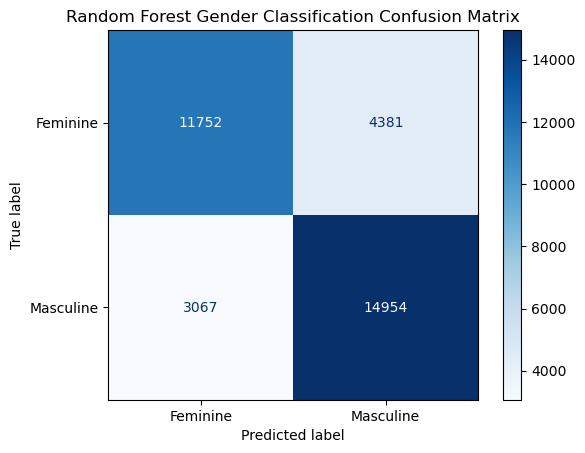

📈 Training Multi-Layer Perceptron Classifier...
✅ Multi-Layer Perceptron Model Accuracy: 0.8606

🔍 Evaluation Report for Multi-Layer Perceptron:

              precision    recall  f1-score   support

    Feminine       0.85      0.86      0.85     16133
   Masculine       0.87      0.86      0.87     18021

    accuracy                           0.86     34154
   macro avg       0.86      0.86      0.86     34154
weighted avg       0.86      0.86      0.86     34154



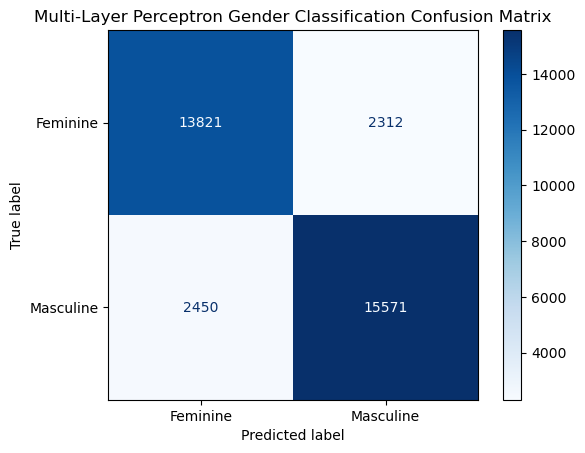

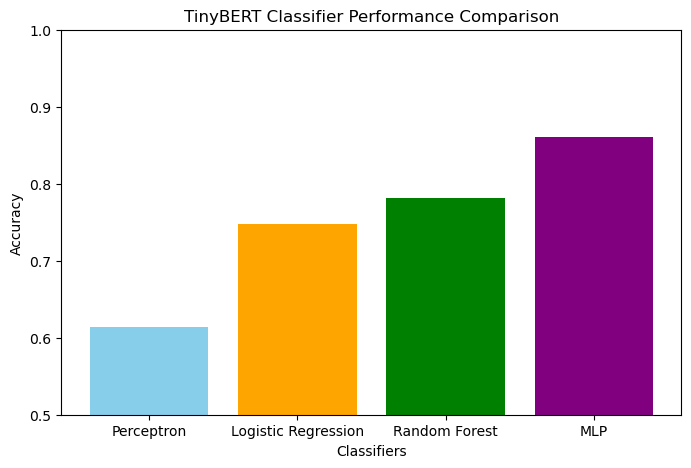


🏆 Running Pipeline for DistilBERT 🏆

📥 Loading data from: C:/Users/user1/Desktop/HarvestWE-main/DistilBERT_embeddings_with_gender_1.csv
✅ Data Loaded: 170766 samples, 768 dimensions.

📊 Data Split: 
   - Training Data: (136612, 768), Labels: (136612,)
   - Testing Data: (34154, 768), Labels: (34154,)

📈 Training Perceptron Classifier...
✅ Perceptron Model Accuracy: 0.7903

🔍 Evaluation Report for Perceptron:

              precision    recall  f1-score   support

    Feminine       0.80      0.74      0.77     16133
   Masculine       0.78      0.84      0.81     18021

    accuracy                           0.79     34154
   macro avg       0.79      0.79      0.79     34154
weighted avg       0.79      0.79      0.79     34154



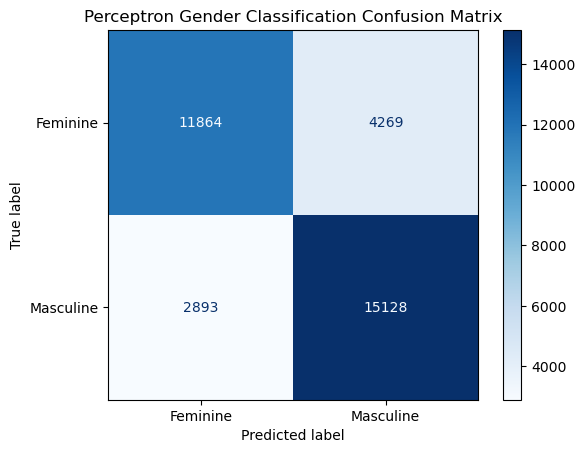

📈 Training Logistic Regression Classifier...
✅ Logistic Regression Model Accuracy: 0.8182

🔍 Evaluation Report for Logistic Regression:

              precision    recall  f1-score   support

    Feminine       0.81      0.80      0.81     16133
   Masculine       0.83      0.83      0.83     18021

    accuracy                           0.82     34154
   macro avg       0.82      0.82      0.82     34154
weighted avg       0.82      0.82      0.82     34154



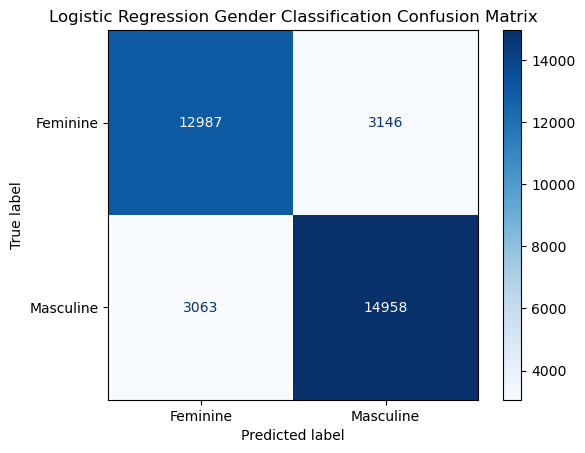

📈 Training Random Forest Classifier...
✅ Random Forest Model Accuracy: 0.8136

🔍 Evaluation Report for Random Forest:

              precision    recall  f1-score   support

    Feminine       0.84      0.75      0.79     16133
   Masculine       0.79      0.87      0.83     18021

    accuracy                           0.81     34154
   macro avg       0.82      0.81      0.81     34154
weighted avg       0.82      0.81      0.81     34154



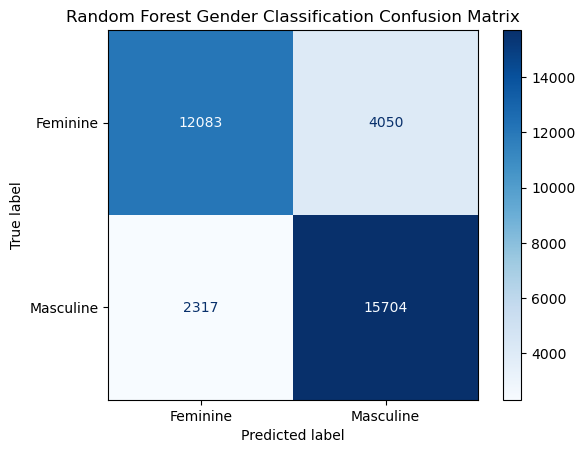

📈 Training Multi-Layer Perceptron Classifier...
✅ Multi-Layer Perceptron Model Accuracy: 0.9009

🔍 Evaluation Report for Multi-Layer Perceptron:

              precision    recall  f1-score   support

    Feminine       0.90      0.89      0.90     16133
   Masculine       0.91      0.91      0.91     18021

    accuracy                           0.90     34154
   macro avg       0.90      0.90      0.90     34154
weighted avg       0.90      0.90      0.90     34154



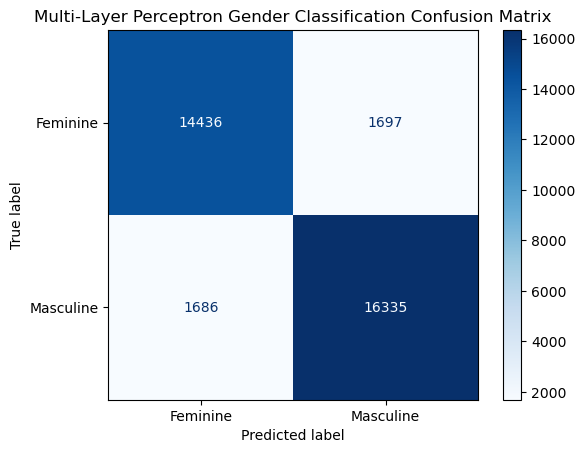

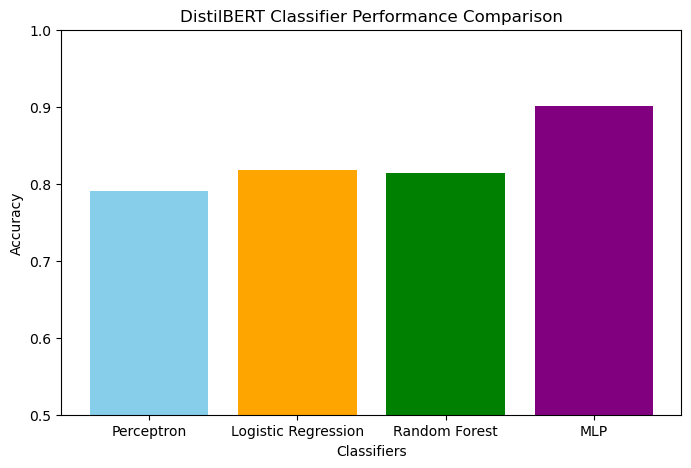

In [5]:
# 🔹 Step 6: Run the Full Pipeline for a Model
def run_pipeline(model_name):
    """
    Run the full data processing, training, and evaluation pipeline for a given model.
    """
    file_path = f"C:/Users/user1/Desktop/HarvestWE-main/{model_name}_embeddings_with_gender_1.csv"

    # Step 1: Load and prepare data
    X, y = load_and_prepare_data(file_path)

    # Step 2: Split data
    X_train, X_test, y_train, y_test = split_data(X, y)

     # Step 3: Initialize classifiers
    perceptron = Perceptron(max_iter=5000, tol=1e-2, random_state=42)
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

    # Train and evaluate classifiers
    perceptron_accuracy = train_and_evaluate_model(perceptron, "Perceptron", X_train, X_test, y_train, y_test)
    log_reg_accuracy = train_and_evaluate_model(log_reg, "Logistic Regression", X_train, X_test, y_train, y_test)
    rf_accuracy = train_and_evaluate_model(random_forest, "Random Forest", X_train, X_test, y_train, y_test)
    mlp_accuracy = train_and_evaluate_model(mlp, "Multi-Layer Perceptron", X_train, X_test, y_train, y_test)
    
     # Compare Results
    results = {
        "Perceptron": perceptron_accuracy,
        "Logistic Regression": log_reg_accuracy,
        "Random Forest": rf_accuracy,
        "MLP": mlp_accuracy,
    }

     # Plot results for comparison
    plt.figure(figsize=(8, 5))
    plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'green', 'purple', 'red'])
    plt.xlabel("Classifiers")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name} Classifier Performance Comparison")
    plt.ylim(0.5, 1.0)  # Adjust y-axis range if needed
    plt.show()
    
# 🚀 Run for TinyBERT
print("====================================")
print("🏆 Running Pipeline for TinyBERT 🏆")
print("====================================\n")
run_pipeline("TinyBERT")

# 🚀 Run for DistilBERT
print("\n====================================")
print("🏆 Running Pipeline for DistilBERT 🏆")
print("====================================\n")
run_pipeline("DistilBERT")